# IV.11.14 (б)

Исследование методов простой итерации для уравнения $x+\ln x=0$

Корень задачи удовлетворяет уравнению $x=e^{-x}$ (единственный положительный корень).

Исследуем варианты:

1. $x_{n+1}=-\ln x_n$  
2. $x_{n+1}=e^{-x_n}$  
3. $x_{n+1}=\frac{x_n+e^{-x_n}}{2}$  
4. $x_{n+1}=\frac{3x_n+5e^{-x_n}}{8}$  

Условие сходимости метода простой итерации:  
Если $|f'(x^*)|<1$, то итерации сходятся к корню.

Корень вычислим численно.

In [17]:
import sympy as sp
x=sp.symbols('x')
f=x+sp.log(x)
root=sp.nsolve(f,0.5)
root

0.567143290409784

## Проверка условий сходимости

In [18]:
x=sp.symbols('x')

root_val=float(root)

f1 = -sp.log(x)
f2 = sp.exp(-x)
f3 = (x+sp.exp(-x))/2
f4 = (3*x+5*sp.exp(-x))/8

d1 = sp.diff(f1,x).subs(x,root_val)
d2 = sp.diff(f2,x).subs(x,root_val)
d3 = sp.diff(f3,x).subs(x,root_val)
d4 = sp.diff(f4,x).subs(x,root_val)

d1,d2,d3,d4

(-1.76322283435190, -0.567143290409784, 0.216428354795108, 0.0205354434938851)

1. $|f_1'(x^*)|>1$ — метод расходится  
2. $|f_2'(x^*)| \approx x^*\approx 0.567<1$ — сходится локально  
3. $|f_3'(x^*)|<0.5$ — сходится глобально, быстрее чем (2)  
4. $|f_4'(x^*)|\approx 0.02$ — очень быстрая сходимость, лучший метод 

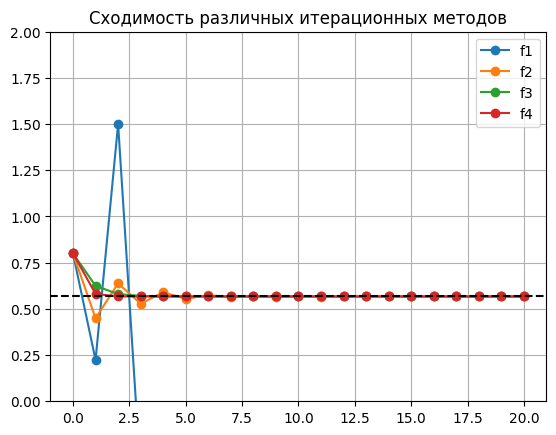

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def f1_iter(x): return -np.log(x)
def f2_iter(x): return np.exp(-x)
def f3_iter(x): return (x+np.exp(-x))/2
def f4_iter(x): return (3*x+5*np.exp(-x))/8

funcs=[f1_iter,f2_iter,f3_iter,f4_iter]
labels=['f1','f2','f3','f4']

x0=0.8
N=20

plt.figure()
for f,label in zip(funcs,labels):
    xs=[x0]
    for k in range(N):
        if xs[-1]<=0: break
        xs.append(f(xs[-1]))
    plt.plot(xs,label=label,marker='o')
plt.axhline(root_val,color='k',linestyle='--')
plt.ylim(0,2)
plt.title("Сходимость различных итерационных методов")
plt.legend()
plt.grid()
plt.show()


# IV.12.3 (б)

Рассмотрим значения функции
$$
F(x) = 4x^3 - 12x^2 + 3x - 5
$$
в нескольких точках.

Подставим $x=2$ и $x=3$:
$$
F(2) = 4\cdot 8 - 12\cdot 4 + 3\cdot 2 - 5 = 32 - 48 + 6 - 5 = -15 < 0,
$$
$$
F(3) = 4\cdot 27 - 12\cdot 9 + 3\cdot 3 - 5 = 108 - 108 + 9 - 5 = 4 > 0.
$$

Так как $F$ непрерывна, то уравнение $F(x)=0$ имеет **как минимум один корень** на отрезке $[2,3]$.

Проверим промежуточные значения (это будет сделано также численно ниже), например:
- $F(2.8) < 0$,
- $F(2.9) > 0$,

значит корень лежит в более узком интервале
$$
x^* \in (2.8, 2.9).
$$

Численно можно получить приближение
$$
x^* \approx 2.890145\ldots
$$


## 3. Метод простой итерации (МПИ)

Будем искать корень на интервале $[2.8, 2.9]$. Используем **метод релаксации** вида
$$
x_{k+1} = f(x_k) = x_k - \tau F(x_k),
$$
где $\tau$ — постоянный параметр.

Для сходимости достаточно, чтобы на рассматриваемом интервале выполнялось
$$
|f'(x)| \le q < 1.
$$

В нашем случае
$$
f(x) = x - \tau F(x),
$$
поэтому
$$
f'(x) = 1 - \tau F'(x),
$$
где
$$
F'(x) = \frac{d}{dx}(4x^3 - 12x^2 + 3x - 5) = 12x^2 - 24x + 3.
$$

На интервале $[2.8, 2.9]$ оценим $F'(x)$:

- при $x = 2.8$:
  $$
  F'(2.8) = 12\cdot 2.8^2 - 24\cdot 2.8 + 3 \approx 29.88,
  $$
- при $x = 2.9$:
  $$
  F'(2.9) = 12\cdot 2.9^2 - 24\cdot 2.9 + 3 \approx 34.32.
  $$

Поскольку $F''(x) = 24x - 24 > 0$ при $x > 1$, производная $F'(x)$ возрастает, значит
$$
29.88 \le F'(x) \le 34.32, \quad x \in [2.8, 2.9].
$$

Выберем, например, $\tau = 0.03$. Тогда
$$
f'(x) = 1 - 0.03\,F'(x).
$$

Оценим $f'(x)$ на концах отрезка:

- при $x=2.8$:
  $$
  f'(2.8) = 1 - 0.03 \cdot 29.88 \approx 1 - 0.8964 = 0.1036,
  $$
- при $x=2.9$:
  $$
  f'(2.9) = 1 - 0.03 \cdot 34.32 \approx 1 - 1.0296 = -0.0296.
  $$

Следовательно, для всех $x \in [2.8, 2.9]$ имеем
$$
|f'(x)| \le \max\big(|0.1036|,\ |{-0.0296}|\big) \approx 0.104 = q < 1.
$$

По теореме о сжимающем отображении:
- отображение $f$ является **сжимающим** на $[2.8, 2.9]$,
- уравнение $x=f(x)$ имеет **единственное решение** $x^*$ на этом отрезке,
- итерации
  $$
  x_{k+1} = f(x_k) = x_k - 0.03\,F(x_k)
  $$
  при $x_0 \in [2.8, 2.9]$ **сходятся к корню** $x^*$.

Таким образом, мы построили **сходящийся метод простой итерации** и аналитически показали его сходимость.



## 4. Оценка числа итераций для МПИ

Для сжимающего отображения с константой $q < 1$ справедлива оценка:
$$
|x_{k+1} - x^*| \le \frac{q^k}{1 - q}\,|x_1 - x_0|.
$$

Пусть мы выбираем начальное приближение $x_0 = 2.85 \in [2.8, 2.9]$ и считаем $x_1 = f(x_0)$. Тогда численно можно оценить величину $|x_1 - x_0|$ (см. код ниже).

Нам нужно гарантировать
$$
|x_k - x^*| \le 10^{-3}.
$$

Достаточно, чтобы выполнялось
$$
\frac{q^k}{1 - q} \, |x_1 - x_0| \le 10^{-3}.
$$

Отсюда получаем оценку на $k$:
$$
q^k \le \frac{(1-q)\cdot 10^{-3}}{|x_1 - x_0|}
\quad\Longrightarrow\quad
k \ge
\frac{\ln\left(\dfrac{(1-q)\cdot 10^{-3}}{|x_1 - x_0|}\right)}{\ln q}.
$$

Подставляя $q \approx 0.104$ и численное значение $|x_1 - x_0|$ (будет получено в коде), можно получить конкретное число итераций $k$.

На практике, как показывает эксперимент, МПИ с выбранным $\tau=0.03$ выходит на точность $10^{-3}$ за **несколько десятков итераций** (точное значение будет показано ниже).



## 5. Метод Ньютона

Метод Ньютона для уравнения $F(x)=0$ задаётся формулой:
$$
x_{k+1} = x_k - \frac{F(x_k)}{F'(x_k)}.
$$

В нашем случае
$$
F(x) = 4x^3 - 12x^2 + 3x - 5,
$$
$$
F'(x) = 12x^2 - 24x + 3.
$$

Значит, итерационная формула Ньютона:
$$
x_{k+1} = x_k - \frac{4x_k^3 - 12x_k^2 + 3x_k - 5}{12x_k^2 - 24x_k + 3}.
$$

Если $F$ дважды непрерывно дифференцируема и $F'(x^*) \neq 0$, то при достаточно близком к корню начальном приближении метод Ньютона имеет **квадратичную скорость сходимости**:
$$
|x_{k+1} - x^*| \approx C\,|x_k - x^*|^2,
$$
где $C$ — некоторая константа.

In [20]:
import sympy as sp
import numpy as np

x = sp.symbols('x')
F = 4*x**3 - 12*x**2 + 3*x - 5
Fp = sp.diff(F, x)

print("F(2)   =", F.subs(x, 2))
print("F(3)   =", F.subs(x, 3))
print("F(2.8) =", F.subs(x, 2.8))
print("F(2.9) =", F.subs(x, 2.9))

roots = sp.nroots(F)
print("\nЧисленные корни:")
for r in roots:
    print(r)


F(2)   = -15
F(3)   = 4
F(2.8) = -2.87200000000000
F(2.9) = 0.335999999999999

Численные корни:
2.89014538584150
0.0549273070792499 - 0.655352717789005*I
0.0549273070792499 + 0.655352717789005*I


In [21]:
def F_func(x):
    return 4*x**3 - 12*x**2 + 3*x - 5

def Fp_func(x):
    return 12*x**2 - 24*x + 3

tau = 0.03

def mpi_step(x):
    return x - tau*F_func(x)

# Запуск МПИ
x0 = 2.85
x = x0
max_iter = 1000
eps = 1e-3

history_mpi = [x0]
for k in range(1, max_iter+1):
    x_new = mpi_step(x)
    history_mpi.append(x_new)
    if abs(x_new - x) < eps:  # простой критерий по приращению
        print(f"МПИ: остановились на шаге k={k}, |x_new - x|={abs(x_new - x):.3e}")
        break
    x = x_new
else:
    print("МПИ: достигнут максимум итераций без достижения критерия.")

print(f"Приближение МПИ: x ≈ {x_new:.10f}")

# Оценка априорного числа итераций по формуле с q
q = 0.104  # оценка сверху для |f'(x)|
x1 = history_mpi[1]
x0 = history_mpi[0]
num = (1-q)*eps
den = abs(x1 - x0)
k_est = np.log(num/den) / np.log(q)
print(f"Априорная оценка числа итераций (по формуле): k ≥ {k_est:.2f}")


МПИ: остановились на шаге k=2, |x_new - x|=4.474e-04
Приближение МПИ: x ≈ 2.8901523678
Априорная оценка числа итераций (по формуле): k ≥ 1.68


In [22]:
def newton_step(x):
    return x - F_func(x)/Fp_func(x)

# начальное приближение — результат МПИ
x0_newton = history_mpi[-1]
x = x0_newton
eps_newton = 1e-3
max_iter_newton = 50

history_newton = [x]
for k in range(1, max_iter_newton+1):
    x_new = newton_step(x)
    history_newton.append(x_new)
    print(f"k={k:2d}: x={x_new:.12f}, |dx|={abs(x_new - x):.3e}")
    if abs(x_new - x) < eps_newton:
        print(f"\nНьютон: остановились на шаге k={k}, |x_new - x|={abs(x_new - x):.3e}")
        break
    x = x_new
else:
    print("Ньютон: максимум итераций без достижения критерия.")

x_newton_final = history_newton[-1]
print(f"\nПриближение Ньютона: x ≈ {x_newton_final:.12f}")


k= 1: x=2.890145385874, |dx|=6.982e-06

Ньютон: остановились на шаге k=1, |x_new - x|=6.982e-06

Приближение Ньютона: x ≈ 2.890145385874


Приближённый корень: x* ≈ 2.890145385842


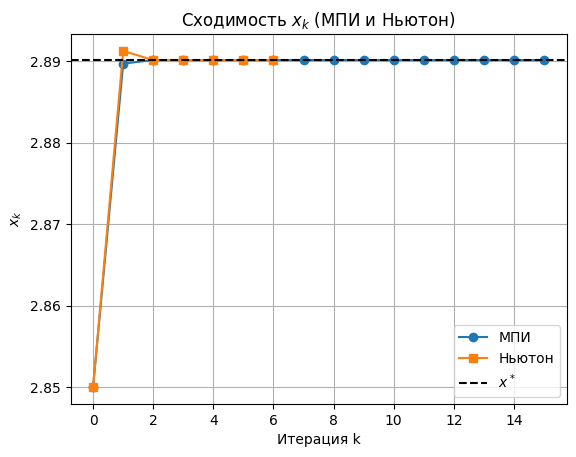

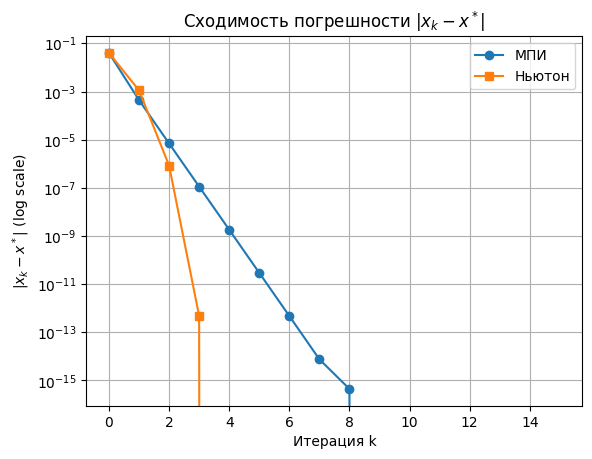

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

x_sym = sp.symbols('x')
F_sym = 4*x_sym**3 - 12*x_sym**2 + 3*x_sym - 5
root = sp.nroots(F_sym)[0]
x_star = float(sp.re(root))

print(f"Приближённый корень: x* ≈ {x_star:.12f}")

x0 = 2.85
N_mpi = 15
N_newton = 6

# МПИ
x_vals_mpi = [x0]
for k in range(N_mpi):
    x_vals_mpi.append(mpi_step(x_vals_mpi[-1]))

errors_mpi = [abs(x - x_star) for x in x_vals_mpi]

# Ньютон (стартуем из того же x0)
x_vals_newton = [x0]
for k in range(N_newton):
    x_vals_newton.append(newton_step(x_vals_newton[-1]))

errors_newton = [abs(x - x_star) for x in x_vals_newton]

# График x_k для МПИ и Ньютона
plt.figure()
plt.plot(range(len(x_vals_mpi)), x_vals_mpi, marker='o', label='МПИ')
plt.plot(range(len(x_vals_newton)), x_vals_newton, marker='s', label='Ньютон')
plt.axhline(x_star, color='k', linestyle='--', label='$x^*$')
plt.title("Сходимость $x_k$ (МПИ и Ньютон)")
plt.xlabel("Итерация k")
plt.ylabel("$x_k$")
plt.legend()
plt.grid()
plt.show()

# Логарифмический график погрешностей
plt.figure()
plt.semilogy(range(len(errors_mpi)), errors_mpi, marker='o', label='МПИ')
plt.semilogy(range(len(errors_newton)), errors_newton, marker='s', label='Ньютон')
plt.title("Сходимость погрешности $|x_k - x^*|$")
plt.xlabel("Итерация k")
plt.ylabel("$|x_k - x^*|$ (log scale)")
plt.legend()
plt.grid(True, which='both')
plt.show()


# IV.12.6 (д)


## 1. Система и её Якобиан

Обозначим
$$
F_1(x,y) = x^7 - 5x^2 y^4 + 1510,\qquad
F_2(x,y) = y^3 - 3x^4 y - 105.
$$

Векторно:
$$
u = \begin{pmatrix}x\\y\end{pmatrix},\qquad
F(u) = \begin{pmatrix}F_1(x,y)\\F_2(x,y)\end{pmatrix}.
$$

Матрица Якоби:
$$
J(x,y) =
\begin{pmatrix}
\frac{\partial F_1}{\partial x} & \frac{\partial F_1}{\partial y}\\[4pt]
\frac{\partial F_2}{\partial x} & \frac{\partial F_2}{\partial y}
\end{pmatrix}.
$$


In [24]:

import sympy as sp

x, y = sp.symbols('x y', real=True)

F1 = x**7 - 5*x**2*y**4 + 1510
F2 = y**3 - 3*x**4*y - 105

J = sp.Matrix([F1, F2]).jacobian([x, y])

F1, F2, J


(x**7 - 5*x**2*y**4 + 1510,
 -3*x**4*y + y**3 - 105,
 Matrix([
 [7*x**6 - 10*x*y**4,    -20*x**2*y**3],
 [        -12*x**3*y, -3*x**4 + 3*y**2]]))


## 2. Метод Ньютона для системы

Итерационный процесс Ньютона для $F(u)=0$ выглядит так:
$$

J(x_k,y_k)
\begin{pmatrix}
\Delta x_k\\[2pt]
\Delta y_k
\end{pmatrix}
= -
\begin{pmatrix}
F_1(x_k,y_k)\\[2pt]
F_2(x_k,y_k)
\end{pmatrix},
$$

$$
\begin{pmatrix}
x_{k+1}\\y_{k+1}
\end{pmatrix}
=
\begin{pmatrix}
x_k\\y_k
\end{pmatrix}
+
\begin{pmatrix}
\Delta x_k\\\Delta y_k
\end{pmatrix}.
$$


In [25]:
solutions = []

starts = [
    (-3, -1),
    (-2, -3),
    (-1,  5),
    ( 1,  5),
    ( 2, -3),
    (-3,  1),
    (-2,  2),
    ( 2,  2),
    ( 0,  5),
    ( 0, -3),
]

def add_solution(sol, sols, tol=1e-6):
    sx, sy = float(sol[0]), float(sol[1])
    for (ax, ay) in sols:
        if abs(sx-ax) < tol and abs(sy-ay) < tol:
            return
    sols.append((sx, sy))

for x0, y0 in starts:
    try:
        sol = sp.nsolve((F1, F2), (x, y), (x0, y0), tol=1e-20, maxsteps=50, prec=80)
        add_solution(sol, solutions)
    except Exception:
        pass

print("Найденные (уникальные) решения:")
for i, (sx, sy) in enumerate(solutions, 1):
    print(f"{i}: x ≈ {sx:.12f}, y ≈ {sy:.12f}")

print("\nНевязки F(x,y) для найденных корней:")
for i, (sx, sy) in enumerate(solutions, 1):
    val1 = float(F1.subs({x: sx, y: sy}))
    val2 = float(F2.subs({x: sx, y: sy}))
    print(f"{i}: F1={val1:.3e}, F2={val2:.3e}")


Найденные (уникальные) решения:
1: x ≈ -2.844479535709, y ≈ -0.535415787061
2: x ≈ -1.962409942368, y ≈ -2.918994053274
3: x ≈ -0.758103350421, y ≈ 4.787702756467
4: x ≈ 0.758168057494, y ≈ 4.787726658180
5: x ≈ 1.954880545432, y ≈ -3.034003574972

Невязки F(x,y) для найденных корней:
1: F1=-3.997e-13, F2=1.421e-14
2: F1=0.000e+00, F2=2.842e-14
3: F1=4.547e-13, F2=-1.599e-14
4: F1=-2.274e-13, F2=8.882e-15
5: F1=0.000e+00, F2=2.842e-14
